<a href="https://colab.research.google.com/github/Vishnu-K-Menon/flower-classification/blob/main/flower%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
!wget --no-check-certificate \
    "https://github.com/Vishnu-K-Menon/flower-classification/archive/refs/heads/main.zip" \
    -O "/tmp/flowers.zip"

zip_ref = zipfile.ZipFile('/tmp/flowers.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()



--2022-07-15 14:34:39--  https://github.com/Vishnu-K-Menon/flower-classification/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Vishnu-K-Menon/flower-classification/zip/refs/heads/main [following]
--2022-07-15 14:34:39--  https://codeload.github.com/Vishnu-K-Menon/flower-classification/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/flowers.zip’

/tmp/flowers.zip        [            <=>     ] 449.83M  28.4MB/s    in 16s     

2022-07-15 14:34:56 (28.1 MB/s) - ‘/tmp/flowers.zip’ saved [471683104]



In [3]:
base_dir = '/tmp/flower-classification-main/flowerssplit/train'

daisy_dir = os.path.join(base_dir, 'daisy')
dandelion_dir = os.path.join(base_dir, 'dandelion')
rose_dir = os.path.join(base_dir, 'rose')
sunflower_dir = os.path.join(base_dir, 'sunflower')
tulip_dir = os.path.join(base_dir, 'tulip')

print('total training daisy images:', len(os.listdir(daisy_dir)))
print('total training dandelion images:', len(os.listdir(dandelion_dir)))
print('total training rose images:', len(os.listdir(rose_dir)))
print('total training sunflower images:', len(os.listdir(sunflower_dir)))
print('total training tulip images:', len(os.listdir(tulip_dir)))

daisy_files = os.listdir(daisy_dir)
print(daisy_files[:10])

dandelion_files = os.listdir(dandelion_dir)
print(dandelion_files[:10])

rose_files = os.listdir(rose_dir)
print(rose_files[:10])

sunflower_files = os.listdir(sunflower_dir)
print(sunflower_files[:10])

tulip_files = os.listdir(tulip_dir)
print(tulip_files[:10])

total training daisy images: 611
total training dandelion images: 841
total training rose images: 627
total training sunflower images: 586
total training tulip images: 787
['5673728_71b8cb57eb.jpg', '19544831049_0d738d4872_m.jpg', '4790631791_21e9648097_n.jpg', '5904946193_bd1eb1f39d_n.jpg', '1392946544_115acbb2d9.jpg', '144603918_b9de002f60_m.jpg', '5679288570_b4c52e76d5.jpg', '33855966243_01b2486428_n.jpg', '5740004086_690a1eef85_n.jpg', '3098641292_76c908ba1f_n.jpg']
['8737699225_19e0c9f0fa_m.jpg', '16949657389_ac0ee80fd1_m.jpg', '5644234724_cb0917ee33_m.jpg', '4278757393_bca8415ed4_n.jpg', '15821571649_06c4b9a868_n.jpg', '13290033_ebd7c7abba_n.jpg', '2470874500_43d8011e75.jpg', '5598014250_684c28bd5c_n.jpg', '33914172633_592a6eb74f_n.jpg', '32120685303_90b5f21ab2_n.jpg']
['28131227642_e279b5768b_n.jpg', '7471891548_40f350dff2_n.jpg', '7147367479_f7a6ef0798.jpg', '12395698413_c0388278f7.jpg', '5002452394_22896fb9df_n.jpg', '12323085443_8ac0cdb713_n.jpg', '4612826243_7d86870a1b_n.jpg

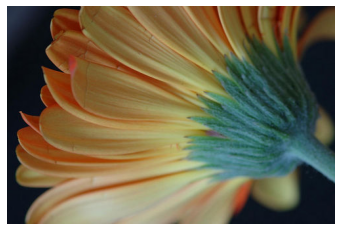

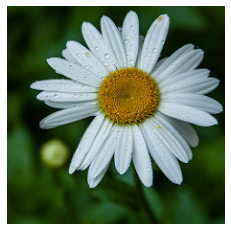

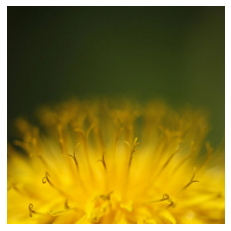

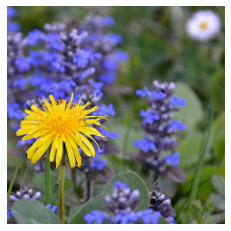

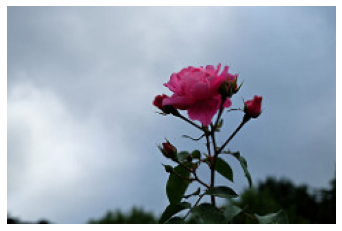

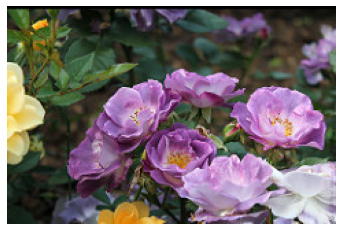

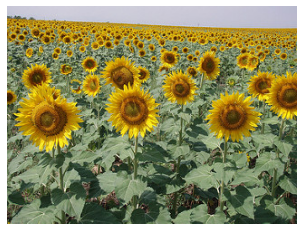

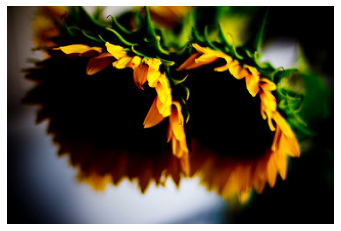

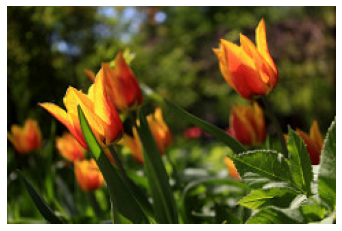

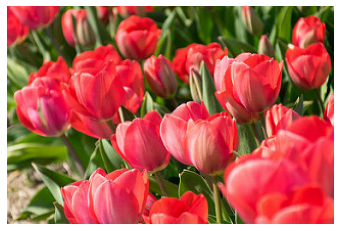

In [4]:
import matplotlib.image as mpimg
pic_index = 2

next_daisy = [os.path.join(daisy_dir, fname) 
                for fname in daisy_files[pic_index-2:pic_index]]
next_dandelion = [os.path.join(dandelion_dir, fname) 
                for fname in dandelion_files[pic_index-2:pic_index]]
next_rose = [os.path.join(rose_dir, fname) 
                for fname in rose_files[pic_index-2:pic_index]]
next_sunflower = [os.path.join(sunflower_dir, fname) 
                for fname in sunflower_files[pic_index-2:pic_index]]
next_tulip = [os.path.join(tulip_dir, fname) 
                for fname in tulip_files[pic_index-2:pic_index]]                


for i, img_path in enumerate(next_daisy+next_dandelion+next_rose+next_sunflower+next_tulip):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.91):
      print("\nReached 91% accuracy, canceling training")
      self.model.stop_training = True

callbacks = myCallback()

In [13]:
#callbacks = myCallback()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(255, 255, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [14]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 253, 253, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [17]:
train_dir = "/tmp/flower-classification-main/flowerssplit/train"
train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

validation_dir = "/tmp/flower-classification-main/flowerssplit/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
	train_dir,
	target_size=(180,180),
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(180,180),
	class_mode='categorical',
  batch_size=32
)

Found 3452 images belonging to 5 classes.
Found 865 images belonging to 6 classes.
